Chen, L., Sinavski, O., Hünermann, J., Karnsund, A., Willmott, A. J., Birch, D., ... & Shotton, J. (2023). [Driving with LLMs: Fusing Object-Level Vector Modality for Explainable Autonomous Driving](https://arxiv.org/abs/2310.01957). arXiv preprint arXiv:2310.01957.

**Abstract**
<!-- Large Language Models (LLMs) have shown promise in the autonomous driving sector, particularly in generalization and interpretability. 
We introduce a unique object-level multimodal LLM architecture that merges vectorized numeric modalities with a pre-trained LLM to improve context understanding in driving situations.
We also present a new dataset of 160k QA pairs derived from 10k driving scenarios, paired with high quality control commands collected with RL agent and question answer pairs generated by teacher LLM (GPT-3.5). 
A distinct pretraining strategy is devised to align numeric vector modalities with static LLM representations using vector captioning language data. 
We also introduce an evaluation metric for Driving QA and demonstrate our LLM-driver's proficiency in interpreting driving scenarios, answering questions, and decision-making. 
Our findings highlight the potential of LLM-based driving action generation in comparison to traditional behavioral cloning. 
We make our benchmark, datasets, and model available for further exploration. -->
大型语言模型(LLMs)在自动驾驶领域已经表现出希望, 特别是在泛化性和可解释性方面。
我们引入了一种独特的对象级多模态 LLM 架构, 该架构将向量化数字模态与预训练的 LLM 融合, 以提高驾驶情况下的上下文理解。
我们还提出了一个新的数据集, 包含源自 10k 驾驶场景的 160k QA 对, 将(用RL智能体收集的高质量控制命令)和(由teacher LLM (GPT-3.5) 生成的问答对)匹配。
设计了一种独特的预训练策略, 使用向量字幕语言数据, 将数字向量模态与静态 LLM 表示对齐。
我们还引入了驾驶QA的评估指标, 并展示了我们的LLM-driver在解释驾驶场景、回答问题和决策方面的熟练度。
与传统的行为克隆相比, 我们的研究结果凸显了基于LLM的驾驶行为生成的潜力。
我们提供[基准、数据集和模型](https://github.com/wayveai/driving-with-llms)以供进一步探索。

# Introduction
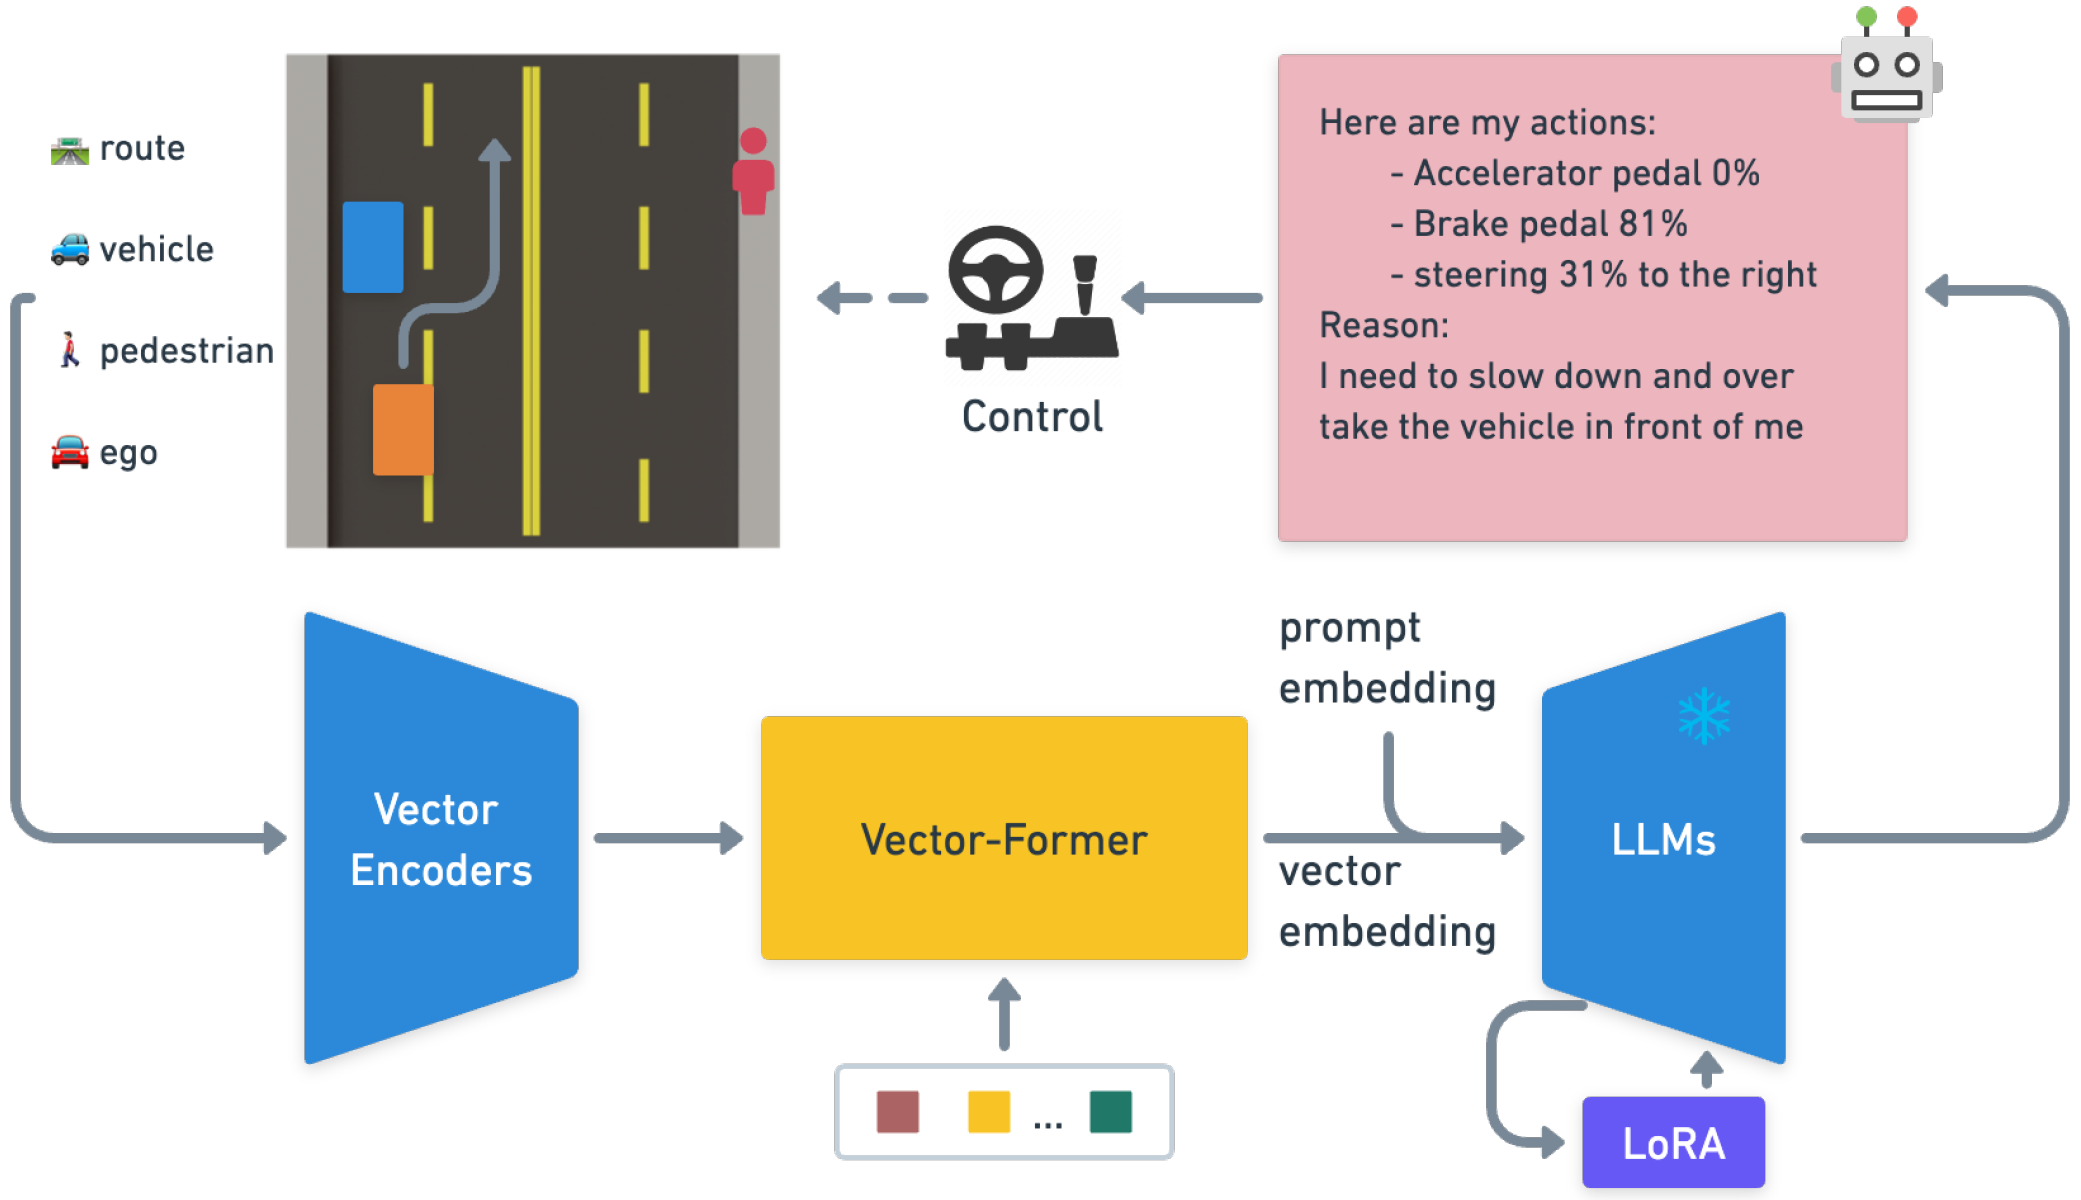
<!-- Figure 1: An overview of the architecture for Driving with LLMs, demonstrating how object-level vector input from our driving simulator is employed to predict actions via LLMs -->
图1: 使用 LLMs 的自驾架构概述, 展示了如何使用(来自驾驶模拟器的)对象级向量输入, 通过 LLMs 预测动作

<!-- Remarkable abilities of Large Language Models (LLMs) demonstrate early signs of artificial general intelligence (AGI) [1], exhibiting capabilities such as out-of-distribution (OOD) reasoning, common sense understanding, knowledge retrieval, and the ability to naturally communicate these aspects with humans. These capabilities align well with the focus areas of autonomous driving and robotics [2, 3]. -->
大型语言模型 (LLMs) 的卓越能力展示了通用人工智能 (AGI) [1] 的早期迹象, 展现出分布外 (OOD) 推理、常识理解、知识检索和自然沟通等能力, 这些方面与人类有关。
这些能力与自动驾驶和机器人的重点领域非常吻合 [2, 3]。

<!-- Modern scalable autonomous driving systems, whether they adopt an end-to-end approach using a single network [4], or a component-based configuration that combines learnable perception and motion planning modules [5, 6], face common challenges. 
These systems often behave as 'blackboxes' in the decision making process, making it especially difficult to endow them with OOD reasoning and interpretability capabilities. 
Such issues persist even though there have been some strides towards addressing them [7]. -->
现代可扩展的自动驾驶系统, 无论它们采用单网络的端到端方法[4], 还是(结合可学习感知和运动规划模块的)基于组件的配置[5, 6], 都面临共同的挑战。
这些系统在决策过程中通常表现为"黑匣子", 因此赋予它们 OOD 推理和可解释能力尤其困难。
尽管在解决这些问题方面已经取得了一些进展, 但这些问题仍然存在[7]。

<!-- Textual or symbolic modality, with its inherent suitability for logical reasoning, knowledge retrieval, and human communication, serves as an excellent medium for harnessing the capabilities of LLMs [8]. 
However, its linear sequential nature limits nuanced spatial understanding [1], a crucial aspect of autonomous navigation. 
Pioneering work in Visual Language Models (VLMs) has begun to bridge this gap by merging visual and text modalities [9], enabling spatial reasoning with the power of pretrained LLMs. 
However, effectively incorporating the new modality into the language representation space requires extensive pretraining with a significant volume of labeled image data. -->
文本或符号模态因其适用于逻辑推理、知识检索和人类交流, 成为利用LLMs能力的绝佳媒介[8]。
然而, <font color="red">其线性顺序本质限制了细致入微的空间理解</font>[1], 这是自主导航的一个重要方面。
<font color="red">视觉语言模型 (VLM) 领域的开创性工作通过融合视觉和文本模态弥合了这一空白[9]，利用预训练 LLMs 的能力实现空间推理</font>。
然而, 有效地将新模态融合到语言表示空间, 需要使用大量标注的图像数据进行广泛地预训练。

<!-- We propose a novel methodology for integrating the numeric vector modality, a type of data that is frequently used in robotics for representing speed, actuator positions and distance measurements, into pre-trained LLMs. 
Such modality is considerably more compact than vision alleviating some of the VLM scaling challenges. 
Specifically, we fuse vectorized object-level 2D scene representation, commonly used in autonomous driving, into a pre-trained LLM with adapters [10]. 
This fusion enables the model to directly interpret and reason about comprehensive driving situations. 
As a result, the LLMs are empowered to serve as the "brain" of the autonomous driving system, interacting directly with the simulator to facilitate reasoning and action prediction. -->
我们提出了一种新颖的方法, 用于<font color="red">将数值向量模态(一种机器人中常用的数据类型, 用于表示速度、执行器位置和距离测量)集成到预训练的 LLMs 中</font>。
这种模态比视觉更加紧凑, 缓解了一些 VLM 扩展挑战。
<font color="red">具体来说</font>, 我们将自动驾驶中常用的<font color="red">向量化对象级 2D 场景表示融合到带有适配器的预训练 LLM 中</font>[10]。
这种融合使模型能够直接解释和推理全方位驾驶情况。
因此, LLMs 可以充当自动驾驶系统的"大脑", 直接与模拟器交互, 促进推理和动作预测。

<!-- To obtain training data in a scalable way, we first use a custom 2D simulator and train a reinforcement learning (RL) agent to solve the driving scenarios, serving as a substitute for a human driving expert.
To ground the object-level vector into LLMs, we introduce a language generator that translates this numerical data into textual descriptions for representation pretraining. 
We further leverage a teacher LLM (GPT) to generate a question-answering dataset conditioned on the language descriptions of 10k different driving scenarios. 
Our model first undergoes a pretraining phase that enhances the alignment between the numeric vector modality and the latent language representations. 
Next, we train our novel architecture to establish a robust baseline model, LLM-driver, for the driving action prediction and driving question answering tasks. 
We provide our datasets, evaluation benchmarks and a pre-trained model1 for reproducibility and hope to inspire and facilitate further advancements in the field. 
The subsequent sections of this paper detail the theoretical background, our proposed architecture and experimental setup, preliminary results, potential directions for future research, and implications of our work for the broader field of autonomous driving. -->
为了以可扩展的方式获取训练数据, 我们先使用定制的 2D 模拟器并训练强化学习(RL)智能体以解决驾驶场景, 作为人类驾驶专家的替代品。
为了将对象级向量融入 LLMs, 我们引入一个语言生成器, 它可以将这些数值数据转换为文本描述, 用于表示预训练。
我们进一步利用 teacher LLM (GPT), 在10k 种不同驾驶场景的语言描述的基础上, 生成一个问答数据集。
我们的模型<font color="red">首先经历预训练阶段, 增强数值向量模态和潜在语言表示之间的对齐。
接下来, 训练我们的新架构, 建立一个强大的基准模型(LLM-driver), 用于驾驶动作预测和驾驶问答任务</font>。
我们提供数据集、评估基准和预训练模型以便复用, 并希望激发和促进该领域的长足发展。
本文的后续章节详细介绍理论背景、我们提出的架构和实验设置、初步结果、未来研究的潜在方向, 以及我们的工作对更广泛的自动驾驶领域的意义。

<!-- In this paper, we have made the following contributions:
1. Novel object-level multimodal LLM architecture: We propose a novel architecture that fuses an object-level vectorized numeric modality into any LLMs with a two-stage pretraining and finetuning method.
2. Driving scenario QA task and a dataset: We provide a 160k question-answer pairs dataset on 10k driving situations with control commands, collected with RL expert driving agents and an expert LLM-based question answer generator. Additionally, we also outline the methodology for further data collection.
3. Novel Driving QA (DQA) evaluation and a pretrained baseline: We present a novel way to evaluate Driving QA performance using the same expert LLM grader. We provide initial evaluation results and a baseline using our end-to-end multimodal architecture. -->
在本文中，我们做出了以下贡献:
1. 新颖的对象级多模态LLM架构: 我们提出了一种新颖的架构, 通过两阶段预训练和微调方法, 将对象级向量化数值模态融合到任意LLMs中。
2. 驾驶场景 QA 任务和数据集: 我们提供了 10k 种驾驶情况下 160k (带有控制命令的)问答对数据集, 从 RL 专家驾驶智能体和基于 LLM 的专家问答生成器收集。此外, 我们还概述了进一步数据收集的方法。
3. 新颖的驾驶 QA (DQA) 评估和预训练基线: 我们提出了一种新颖方法, 使用同样专业的LLM 评分器, 评估驾驶 QA 性能。我们使用我们的端到端多模式架构, 提供了初步评估结果和基线。

<!-- Our work provides the first-of-its-kind baseline approach for integrating LLMs into driving task in simulation. 
This includes a comprehensive framework encompassing the simulator, automatic data collection, integration of a new object-level vector modality into LLMs, and the GPT-based evaluations approaches. -->
我们的工作提供了首个将LLMs集成到模拟驾驶任务中的基准方法。
这包括一个包含模拟器的全面框架、自动数据收集、将新的对象级向量模态集成到 LLM 中, 以及基于 GPT 的评估方法。

# Related Works(todo)
## End-to-End Autonomous Driving Systems

## Interpretability of Autonomous Driving Systems
<!-- A variety of explainability methods have been introduced [17] to understand the underlying decision process of deep neural networks. 
For example [18], [19] and [20] are well-established model-agnostic interpretability methods that generate explanations for individual predictions. 
Other methods such as gradient based [21], saliency maps [22] and attention maps [23] target the inner operations of models to explain the decision making process. 
In the field of autonomous vehicles, visual attention maps, which highlight causally influential regions in driving images were proposed in [24]. 
In [25] the authors combined attention based methods with natural language to create an attention-based vehicle controller that provides natural language action descriptions and explanations based on a series of image frames. 
This work was further extended in [26], where the authors improved the architecture by integrating part of speech prediction and special token penalties. 
Others argue that attention is not enough [27], leading to multiple efforts to combine this approach with other explanatory methods. 
For example [28] proposes to explain transformers by leveraging attentive class activation tokens, encoded features, their gradients, and their attention weights simultaneously. 
Building on this research, we are proposing to use text modality for explainability in autonomous driving. -->
人们引入了多种可解释性方法[17]来理解深度神经网络的底层决策过程。
例如，[18]、[19]和[20]是成熟的与模型无关的可解释性方法，可为个体预测生成解释。
其他方法，例如基于梯度的[21]、显着图[22]和注意力图[23]，以模型的内部动作为目标来解释决策过程。
在自动驾驶汽车领域，[24]提出了视觉注意图，它突出显示了驾驶图像中具有因果影响的区域。
在[25]中，作者将基于注意力的方法与自然语言相结合，创建了一个基于注意力的车辆控制器，该控制器基于一系列图像帧提供自然语言动作描述和解释。
这项工作在[26]中得到了进一步扩展，作者通过集成词性预测和特殊标记惩罚来改进架构。
其他人则认为注意力不够[27]，导致人们努力将这种方法与其他解释方法结合起来。
例如，[28]建议通过同时利用注意力类激活标记、编码特征、梯度和注意力权重来解释 Transformer。
基于这项研究，我们建议使用文本模式来实现自动驾驶的可解释性。

## Multi-modal LLMs in Driving Tasks
<!-- Recently, there has been a notable trend towards integrating multiple modalities into unified largescale models. 
Notable examples include VLMs such as [29], [30], [31], and [32], which effectively combine language and images to accomplish tasks like image captioning, visual question answering, and image-text similarity. 
Another noteworthy advancement [33] involves the fusion of information from six distinct modalities: text, image/video, audio, depth, thermal, and inertial measurements. 
This exciting development not only expands the possibilities for generating content using diverse data input and output types but also enables broader multi-modal search capabilities. -->
最近，将多种模式集成到统一的大型模型中出现了明显的趋势。
著名的例子包括 [29]、[30]、[31] 和 [32] 等 VLM，它们有效地结合语言和图像来完成图像字幕、视觉问答和图像文本相似性等任务。
另一个值得注意的进步[33]涉及来自六种不同模式的信息的融合：文本、图像/视频、音频、深度、热和惯性测量。
这一令人兴奋的发展不仅扩大了使用不同数据输入和输出类型生成内容的可能性，而且还实现了更广泛的多模式搜索功能。

<!-- With camera sensors being one of the most common sensors used in autonomous driving [34], a natural step to incorporate language has been through VLMs. 
For example [35] uses images and language directions to train a driving policy. 
[36] proposes a method for learning vehicle control with human assistance. 
The system learns to summarize its visual observations in natural language, predict an appropriate action response (e.g. “I see a pedestrian crossing, so I stop”), and predict the controls, accordingly. 
Using language to explain the inner workings of the model has also been explored in [37], where user-friendly natural language narrations and reasoning are provided for each decision making step of autonomous vehicular control and action. -->
由于摄像头传感器是自动驾驶中最常用的传感器之一[34]，整合语言的自然步骤是通过 VLM。
例如[35]使用图像和语言指导来训练驾驶策略。
[36]提出了一种在人类辅助下学习车辆控制的方法。
系统学习用自然语言总结其视觉观察结果，预测适当的动作响应（例如“我看到人行横道，所以我停下来”），并相应地预测控制。
[37]中也探索了使用语言来解释模型的内部工作原理，其中为自主车辆控制和动作的每个决策步骤提供了用户友好的自然语言叙述和推理。

<!-- In robotics, we have seen efforts fusing language with other modalities. 
Albeit outside of autonomous driving field, the closest work to ours [38] utilizes point clouds with 3D bounding boxes of potential object candidates. It also uses a language utterance referring to a target object in the scene to train a model capable of identifying a target object from a set of potential candidates. 
Recently, the RT-2 paper [39] demonstrated a similar approach by utilizing LLMs for low-level robotics control tasks, including the joint training of VQA and control tasks. However, their framework is confined to the vision modality, whereas we introduce a novel methodology for grounding vector-based object level modalities into LLMs, facilitating interpretable control and driving QA tasks. 
In contrast to these existing efforts, the work presented in this paper is, to the best of our knowledge, the first to fuse numeric vector modality with language specifically in the domain of autonomous vehicles. -->
在机器人技术中，我们已经看到了将语言与其他模式融合的努力。
尽管在自动驾驶领域之外，但与我们最接近的工作[38]利用了具有潜在对象候选者的 3D 边界框的点云。 它还使用涉及场景中目标对象的语言话语来训练能够从一组潜在候选对象中识别目标对象的模型。
最近，RT-2 论文 [39] 展示了一种类似的方法，利用 LLM 进行低级机器人控制任务，包括 VQA 和控制任务的联合训练。 然而，他们的框架仅限于视觉模态，而我们引入了一种新颖的方法，将基于向量的对象级模态融入 LLM，促进可解释的控制和驱动 QA 任务。
与这些现有的努力相比，据我们所知，本文提出的工作是第一个将数字向量模态与语言融合的工作，特别是在自动驾驶汽车领域。

# Method
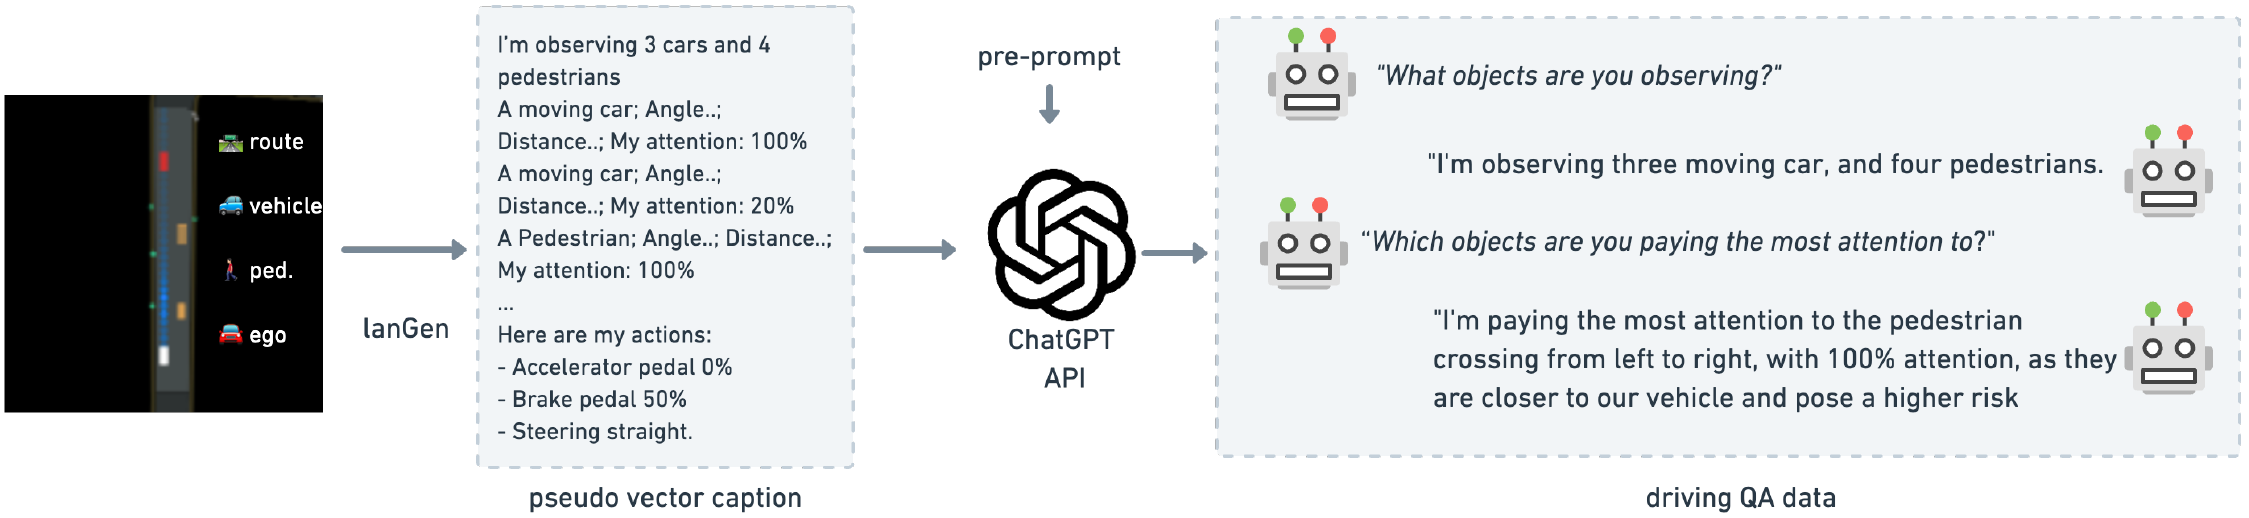
<!-- Figure 2: The illustration of our Driving QA Dataset automatic labelling process -->
图2: 我们的驾驶 QA 数据集自动标注流程示意图

## Data Collection using RL experts
<!-- To generate language-based grounded driving datasets, we use a custom-built realistic 2D simulator with procedural generation of driving scenarios. We use an RL agent that solves the simulated scenarios using an object-level ground-truth representation of the driving scene. In our approach, we map a vector representation of the environment to an action for the vehicle dynamics with an attention-based neural network architecture. This model is optimized with Proximal Policy Optimization (PPO) [40]. Subsequently, we collect continuous driving data from 15 diverse virtual environments with randomly generated traffic conditions. Our collection includes a 100k dataset for pretraining, a 10k set for QA labeling and fine-tuning, and a 1k set dedicated to evaluation. -->
为了生成基于语言的落地驾驶数据集, 我们<font color="red">使用定制的真实 2D 模拟器, 并程序化生成驾驶场景</font>。
我们使用 RL 智能体, 使用驾驶场景的对象级真值表示, 解决模拟场景。
在我们的方法中, 我们<font color="red">使用基于注意力的神经网络架构, 将环境的向量表示映射到车辆动力学的动作</font>。
该模型<font color="red">使用Proximal Policy Optimization (PPO) [40]进行优化</font>。
随后, 我们从 15 个不同虚拟环境(随机生成的交通状况)中收集连续驾驶数据。
我们的采集包括用于预训练的 100k 数据集、用于 QA 标注和微调的 10k 数据集以及专用于评估的 1k 数据集。

## Structured Language Generation for Pseudo Vector Captioning
<!-- In our framework, we aim to convert vector representations into language using a structured language generator to facilitate the grounding the vector representation into LLMs. Since our object-level vectors contain semantically significant attributes, such as the number of cars and pedestrians, their respective locations, orientations, speeds, bounding boxes and other attributes, we employ a structured language generator (lanGen) function to craft pseudo-language labels derived from the vector space, as illustrated below: -->
在我们的框架中, 我们的目的是<font color="red">使用结构化语言生成器, 将向量表示转化为语言, 以便将向量表示融入LLMs</font>。
由于我们的对象级向量包含语义上的重要属性, 例如车辆和行人的数量、它们各自的位置、方向、速度、边框和其他属性, 因此我们采用<font color="blue">结构化语言生成器(lanGen)函数</font>, 制作(从向量空间派生的)伪语言标签, 如下所示:
$$\begin{align}
    & \text{lanGen}\left(v_{car}, v_{ped}, v_{ego}, v_{route}, [o_{rl}]\right) \to \\ 
    & \begin{cases}
        \text{"A moving car; Angle in degrees: 1.19; Distance: 9.98m; [My attention: 78%]} \\
        \text{A pedestrian; Angle in degrees: -41.90; Distance: 11.94m; [My attention: 22%]} \\
        \text{My current speed is 11.96 mph.} \\
        \text{There is a traffic light and it is red. It is 12.63m ahead.} \\
        \text{The next turn is 58 degrees right in 14.51m.} \\
        [\text{Here are my actions:}] \\
        [\text{ - Accelerator pedal 0%}] \\
        [\text{ - Brake pedal 80%}] \\ 
        [\text{ - Steering straight}] \\
        "
    \end{cases}
\end{align}$$

<!-- In this function, variables vcar, vped, vego, and vroute denote vector information corresponding to cars, pedestrians, ego vehicle, and route, respectively. The optional term orl represents the output from the RL agent, consisting of additional attention and action labels for guiding the action reasoning process. Attention labels are collected from RL policy attention layers similar to [41]. -->
在该函数中, 变量$v_{car}$、$v_{ped}$、$v_{ego}$和$v_{route}$分别表示对应于车辆、行人、自车和导航的向量信息。
可选项 $o_{rl}$ 表示 RL 智能体的输出, 包含额外的注意力和动作标签, 用于指导动作推理过程。
注意力标签从 RL 策略注意力层收集, 类似[41]。

<!-- This lanGen enables the transformation of vector representations into human-readable language captions. It crafts a comprehensive narrative of the current driving scenario, which includes of the agent's observations, the agent's current state, and its planned actions. This comprehensive contextual foundation enables the LLMs to conduct reasoning and construct appropriate responses in a manner that humans can interpret and understand. -->
lanGen 能够将向量表示转化为人类可读的语言字幕。
它对当前驾驶场景进行全面地叙述, 其中包括智能体的观察、智能体的当前状态及其规划的动作。
<font color="red">这种全面的上下文基础使 LLMs 能够以人类可以解释和理解的方式, 进行推理并构造适当的响应</font>。

<!-- The inclusion of orl is optional, and we generate two different versions of pseudo labels to cater to different requirements: 1)Without Attention/Action: Employed during the representation pretraining stage (see Subsection 3.4.1), where the inference of attentions and actions is not required. 2)With Attention/Action: Utilized for VQA labeling with GPT during the fine-tuning stage (see Subsection 3.4.2). This equips GPT with the ability to ask specific questions about attentions and actions, thereby empowering the driving LLM agent with the ability to reason about attentions and actions. -->
$o_{rl}$是可选的, 我们生成两个不同版本的伪标签来满足不同的要求: 1) <font color="blue">无注意力/动作: 在表示预训练阶段使用(参见第[3.4.1](#Vector-Representation-Pre-training)小节), 无需注意力和动作的推理</font>。2) <font color="red">有注意力/动作: 在微调阶段使用 GPT 对 VQA 标注(参见第[3.4.2](Driving-QA-Finetuning)小节)。
这使 GPT 能够提出有关注意力和动作的具体问题, 从而使驾驶 LLM 智能体能够推理注意力和动作</font>。

## Driving QA Dataset Labeling
<!-- Large amount of data is the key to enabling the question answering ability of the language models. This becomes particularly crucial when a new modality is introduced to the LLMs; in such circumstances, it is essential to have a high-quality question-answering dataset relevant to the modality input. Studies have demonstrated that data labelled using ChatGPT surpasses crowdsourced workers in terms of performance for text-annotation tasks [42]. Inspired by Self-Instruct [43] and LLaVA [44], we utilize GPT to generate a Driving QA dataset. This dataset is conditioned on the structured language input, serving as a representative for the vectors. -->
海量数据是语言模型实现问答能力的关键。当 LLMs 引入新模态时, 这变得尤为重要; 在这种情况下, 拥有与模态输入相关的高质量问答数据集至关重要。
研究表明, 使用 ChatGPT 标注的数据在文本注释任务的性能方面优于众包工作人员 [42]。
受 Self-Instruct [43] 和 LLaVA [44] 的启发, 我们<font color="red">利用 GPT 生成驾驶 QA 数据集</font>。
该数据集以结构化语言输入为条件, 作为向量表示。

<!-- To be specific, we tasked GPT to emulate the role of a certified professional driving instructor to generate questions and answers for students. We supplied basic driving rules as pre-prompts, covering aspects like traffic signal transitions and the driving side as we are operating in a left-hand driving country. We tasked GPT with creating 16 sets of random questions and answers per scenario, taking into account the current driving scenario provided by language description generated by the lanGen. We also included some instructions to guide the generation of action-related questions, so that they can be easily parsed with regular expressions for evaluating action prediction tasks. -->
具体而言, 我们要求 GPT 模拟经过认证的专业驾驶教练的角色, 为学生生成问题和答案。
我们提供了基本的驾驶规则作为预先提示, 涵盖交通信号转换和驾驶等方面, 因为我们在左舵驾驶国家运营。
我们要求 GPT 为每个场景创建 16 组随机问题和答案, 考虑(lanGen 生成的语言描述所提供的)当前驾驶场景。
我们还提供了一些指令, 指导与动作相关问题的生成, 以便可以使用正则表达式轻松解析这些问题, 以评估预测任务。

<!-- To reduce hallucinations, we established simple guardrail rules. We instructed GPT to include a driving-related question that could not be inferred from the observation input. If faced with such a question, the model's response should be akin to "I'm unable to answer this question based on the observations I have," preventing the model from imagining objects not present in the provided vector observation. -->
为了<font color="red">减少幻觉</font>, 我们制定了简单的护栏规则。
我们指示 GPT 包含一个(无法从观察输入推断出的)与驾驶相关的问题。
如果面临这样的问题, 模型的响应应该类似于"我无法根据我的观察来回答这个问题", 从而防止模型联想(在提供的向量观察中)不存在的对象。

<!-- Additionally, we included a random question unrelated to driving, instructing the model to respond with "As an AI Driver, the question you asked is out of my scope, but I can attempt to answer it." The model would then proceed to answer the question normally, thereby preserving the language model's versatility as a general-purpose assistant. -->
此外, 我们还<font color="red">添加了一个与驾驶无关的随机问题</font>, 指示模型以"作为一名 AI 驾驶员，您提出的问题超出了我的范围，但我可以尝试回答"进行响应。
然后该模型将继续正常回答问题, 从而保留语言模型作为通用助手的多功能性。

<!-- Detailed instructions can be found in our open-sourced code. Below are some examples of the question-answer pairs generated by GPT:
- Question: "What objects are you observing?" Answer: "I'm observing a moving car, and two pedestrians. The car is coming from the opposite direction, and the pedestrians are crossing the street from both the right and left sides."
- Question: "How are you going to drive in this situation and why?" Answer: "Here are my actions: - Accelerator pedal 0% - Brake pedal 7% - Steering straight. Reason: Because I'm maintaining a slow speed due to the pedestrians crossing, and I’m steering straight to keep our vehicle properly aligned with the road."
- Question: "What are the best tourist spots in London?" Answer: "As an AI Driver, the question you asked is out of my scope, but I can try to answer it. Some famous tourist spots in London include the Tower of London, Buckingham Palace, The British Museum, The Shard, and the London Eye." -->
详细说明可以在我们的开源代码中找到。以下是 GPT 生成的问答对的一些示例:
- 问: "你正在观察什么物体?" 答: "我正在观察一辆行驶中的汽车和两个行人。汽车从相反方向驶来, 行人从左右两侧过马路。"
- 问: "在这种情况下您将如何驾驶?为什么?" 答: "我的动作: - 油门踏板 0% - 制动踏板 7% - 直行。原因: 因为行人过马路我保持低速, 所以我直行以保持我们的车辆与道路正确对齐。"
- 问: "伦敦最好的旅游景点有哪些?" 答: "作为一名 AI 驾驶员，您提出的问题超出了我的范围，但我可以尝试回答。伦敦一些著名的旅游景点包括伦敦塔、白金汉宫、大英博物馆、碎片大厦和伦敦眼。"

## Training the Driving LLM Agent

<!-- Training the LLM-Driver involves formulating it as a Driving Question Answering (DQA) problem within the context of a language model. The key to this formulation is the integration of an object-level vector modality into the pre-trained LLMs, creating a multi-modal system capable of interpreting and interacting with both language and vector inputs. -->
训练 LLM-Driver 涉及将其建模为(语言模型上下文中的)驾驶问答 (DQA) 问题。
该建模的关键是将对象级向量模态集成到预训练的 LLMs 中, 创建一个(能够解释语言和向量输入, 并与之交互的)多模态系统。

<!-- We use a two-stage process to train our model for effectively fusing object-level vector modality into the LLM-Driver. In the first stage, we ground the vector representation into an embedding that can be decoded by the LLMs. This is accomplished by freezing the language model and optimizing the weights of the vector encoders and the vector transformer. In the second stage, we finetune the model to the DQA task, training it to answer driving-related questions and take appropriate actions based on its current understanding of the environment. -->
我们使用两阶段过程来训练我们的模型, 为了有效地将对象级向量模态融合到 LLM-Driver 中。
在第一阶段, 我们<font color="blue">将向量表示转化为一个(可以被 LLMs 解码的)嵌入。
通过freezing语言模型, 并优化向量编码器和向量transformer的权重来实现</font>。
在第二阶段, 我们<font color="red">根据 DQA 任务对模型进行微调, 训练它回答与驾驶相关的问题, 并根据当前的环境理解采取适当的动作</font>。

<span id='fig.3'></span>
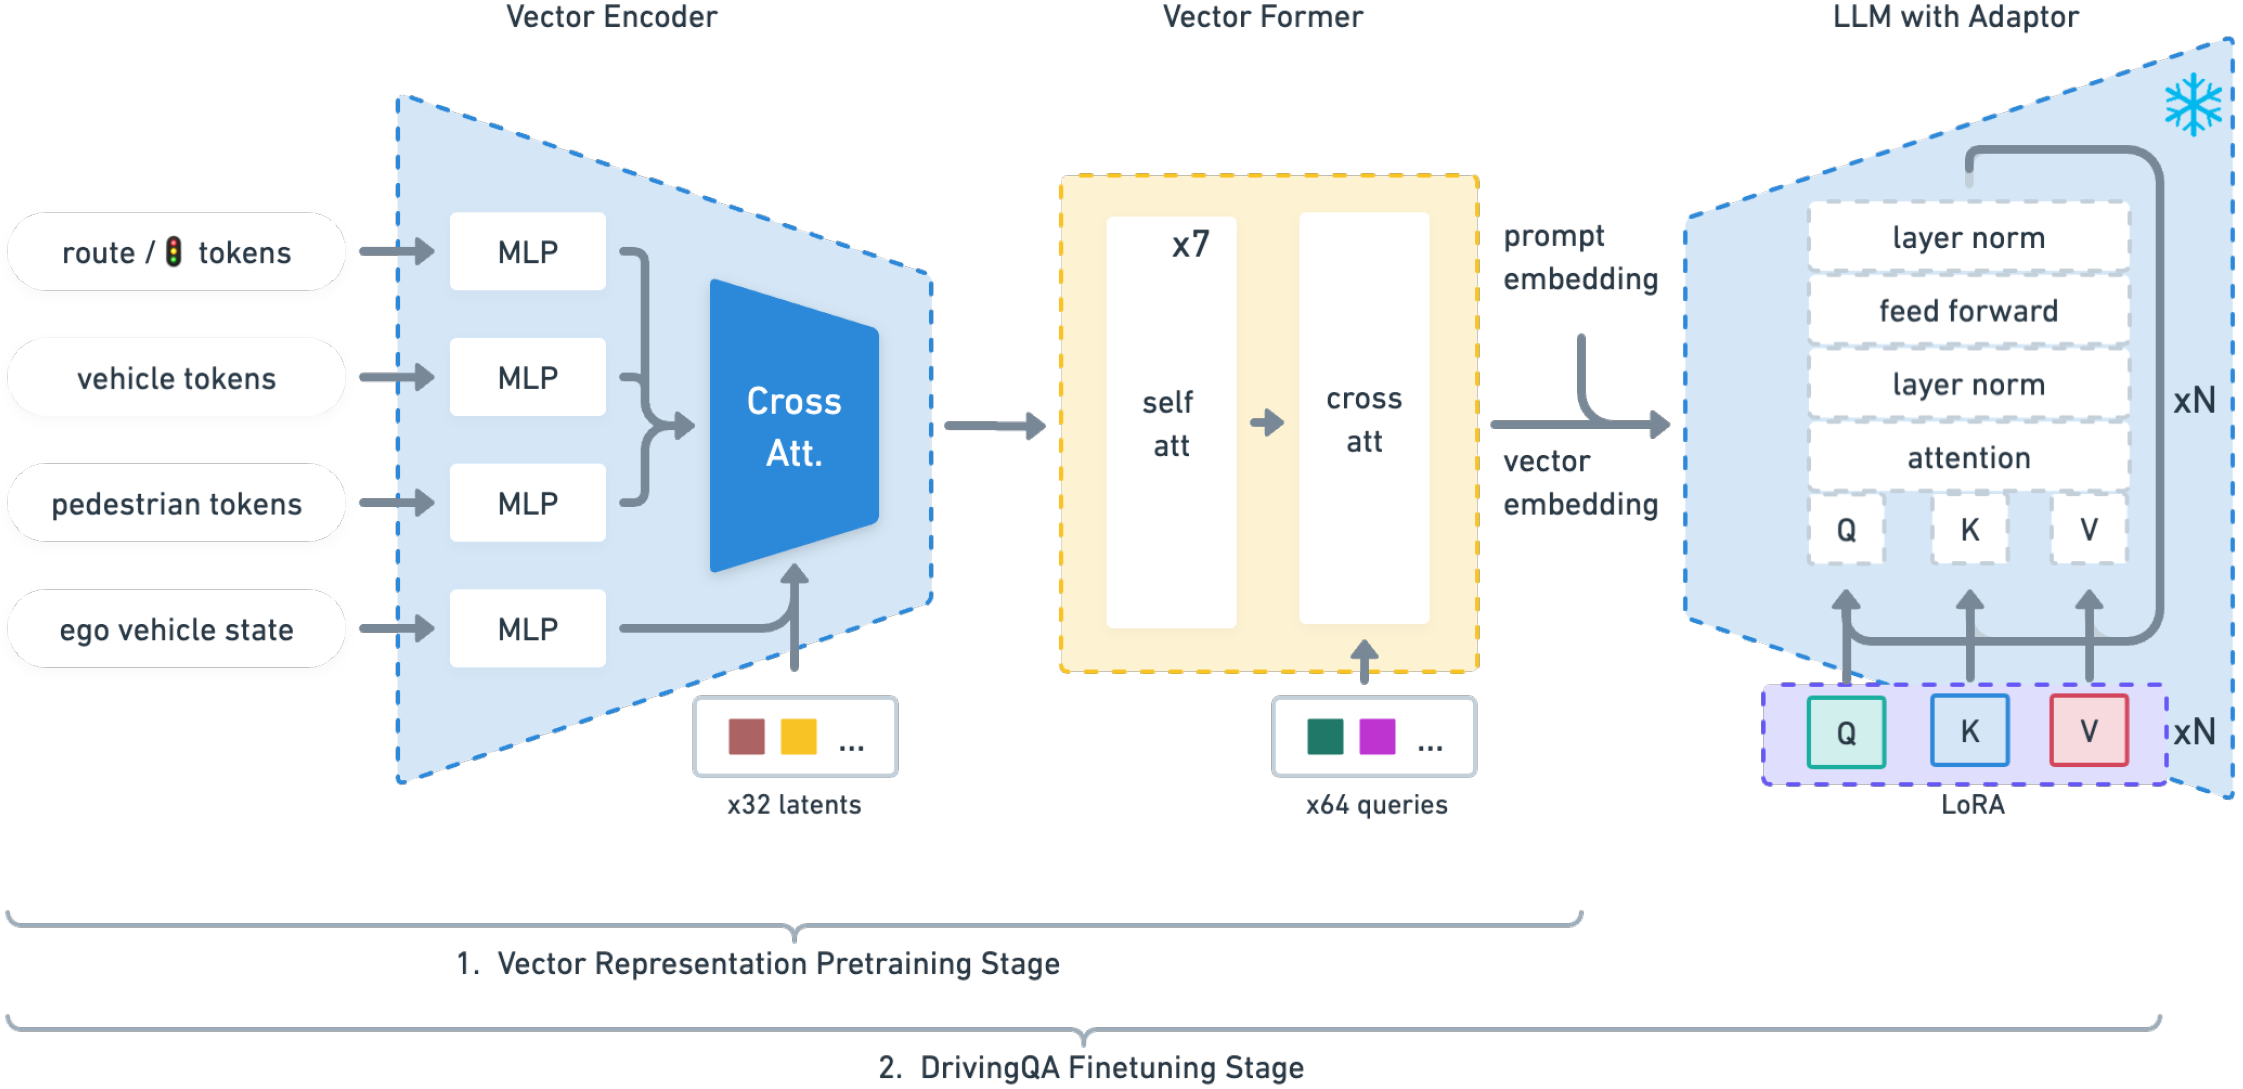
<!-- Figure 3: The architecture of the Driving LLM Agent -->
图3: Driving LLM 智能体的架构

<!-- As can be seen in the Figure 3, our model is built on three key components: the Vector Encoder, Vector Former, and a frozen LLM with a Low-Rank Adaptation (LoRA) [10] module.
- Vector Encoder: The four input vectors are passed through the Multilayer Perceptron (MLP) layers. They're then processed by a cross-attention layer to move them into a latent space. We add the ego feature to each learned input latent vector to emphasize the ego states.
- Vector Former: This part contains self-attention layers and a cross-attention layer that work with the latent space and question tokens. This transforms the latent vectors into an embedding that the LLM can decode.
- LLM with Adaptor: Here, we inject trainable rank decomposition matrices (LoRA) into the linear layers of the pretrained LLMs for parameter-efficient finetuning. We utilize LLaMA-7b [45] as the pretrained LLM for our experiments. -->
如[图 3](#fig.3)所示, 我们的模型基于三个关键组件构建: 向量编码器、向量Former和具有Low-Rank Adaptation (LoRA) [10] 模块的frozen LLM。
- 向量编码器: <font color="red">四个输入向量通过MLP层传入到模型。然后, 它们被交叉注意力层处理, 将它们转移到潜在空间</font>。我们<font color="blue">将自车特征添加到每个学到的输入潜在向量中, 以强调自车状态</font>。
- 向量Former: 这部分包含自注意力层和交叉注意力层, 用于处理潜在空间和问题词元。它<font color="red">将潜在向量转换为一个(LLM 可解码的)嵌入</font>。
- 带适配器的 LLM: 在这里, 我们<font color="red">将可训练的秩分解矩阵 (LoRA) 注入到预训练的 LLMs 的线性层中, 以进行参数高效的微调</font>。我们利用 LLaMA-7b [45] 作为我们实验的预训练 LLM。

### Vector Representation Pre-training
<!-- Integrating a new modality into pre-trained Large Language Models (LLMs) poses significant challenges due to the need for extensive data and computational resources. In this study, we propose a novel approach that leverages structured language to bridge the gap between the vector space and language embeddings, particularly focusing on numerical tokens. -->
由于需要大量数据和计算资源, 将新模态集成到预训练的大型语言模型 (LLMs) 中带来巨大挑战。
在这项研究中, 我们提出了一种新方法, <font color="red">利用结构化语言, 弥合向量空间和语言嵌入之间差距</font>, 特别关注数值词元。

<!-- During the pretraining phase, we freeze the language model while training the entire framework end-to-end to optimize the weights of the vector encoders and the vector transformer (V-former). Such an optimization process enables effective grounding of the vector representation into an embedding that can be directly decoded by the LLMs. It is important to note that during this pretraining phase, we use only perception structured-language labels and avoid training on tasks that involve reasoning, such as action prediction (vehicle control commands) and agent attention prediction (where the expert focuses spatial attention). This is because our focus at this stage is solely on representation training, and we aim to avoid prematurely integrating any reasoning components into the V-former. -->
在预训练阶段, 我们freeze语言模型, 同时端到端地训练整个框架, 以优化向量编码器和向量transformer(V-former)的权重。
这样的优化过程可以有效地将向量表示融入(可由 LLMs 直接解码的)嵌入。
值得注意的是, 在预训练阶段, 我们仅使用感知结构化语言标签, 并避免对涉及推理的任务进行训练, 例如动作预测(车辆控制命令)和智能体注意力预测(专家集中空间注意力的地方)。
这是因为我们现阶段的重点仅在于<font color="red">表示训练</font>, 并且我们的目的是<font color="red">避免过早地将任何推理组件集成到 V-former 中</font>。

<!-- The pretraining process was conducted using 100k question-answer pairs, which were collected from a simulator. Additionally, in each epoch, we sampled 200k vectors with uniformly-distributed random values, contributed to robust representation learning by comprehensively exploring the vector space and its associated semantic meanings. We employed the lanGen method, as described in Sections 3.2, to automatically label the pseudo vector-captioning data. During the pretraining phase, we penalized errors in vector captioning results to optimize the vector encoder and V-former weights, thereby transforming the vector space into language embeddings understandable by LLM. -->
预训练过程使用从模拟器收集的 10 万个问答对。
此外, 在每个 epoch 中, 我们采样了 200k 个均匀分布的随机向量, 通过全面探索向量空间及其相关语义, 为鲁棒的表示学习做出了贡献。
我们<font color="red">采用 lanGen 方法(如[3.2](#Structured-Language-Generation-for-Pseudo-Vector-Captioning)节中所述), 自动标注伪向量字幕数据。
在预训练阶段, 我们惩罚(向量字幕结果中的)误差, 以优化向量编码器和 V-former 权重, 从而将向量空间转化为(LLM可理解的)语言嵌入</font>。

<!-- Through this approach, we are able to effectively incorporate object-level vector modality into pre-trained LLMs, which serves as a good starting point for the finetuning stage. -->
通过这种方法, 我们能够有效地将对象级向量模态集成到预训练的 LLMs 中, 这可以作为微调阶段的良好起点。

### Driving QA Finetuning
<!-- After the pre-training stage, we integrate the trainable LoRA module into the LLM, and optimize the weights of the Vector Encoder, Vector Former and LoRA module in an end-to-end fashion on the Driving QA data that we collected in Section 3.3. -->
在预训练阶段之后, 我们<font color="red">将可训练的 LoRA 模块集成到 LLM 中</font>, 并根据我们在 [3.3](#Driving-QA-Dataset-Labeling)节中收集的驾驶 QA 数据, <font color="red">以端到端的方式优化向量编码器、向量Former 和 LoRA 模块的权重</font>。

<!-- In order to train the LLM-Driver to output accurate actions for driving, we added certain action-triggering questions to the VQA dataset. These are questions that, when asked, require the agent to generate actions in specific format. For example, a question like "How are you going to drive in this case and why?" would require the agent to infer the action based on the vector input. We then use a simple language-action grounding strategy with regular expression matching to extract the action required to control the car in our simulator. To ensure the model pays sufficient attention to these important questions, we upsample the action-triggering questions with different expressions such as: -->
为了训练 LLM-Driver 输出准确的驾驶动作, 我们在 VQA 数据集中添加了一些动作触发问题。
当提问这些问题时, 需要智能体以特定格式生成动作。
例如, 诸如"在这种情况下您将如何驾驶?为什么?"之类的问题, 需要智能体根据向量输入, 推断动作。
然后, 我们使用简单的语言-动作基础策略和正则表达匹配, 在我们的模拟器中提取控制汽车所需的动作。
为了确保模型足够关注这些重要问题, 我们用不同的表达, 对动作触发问题进行上采样, 例如:
- "How are you going to drive in this situation?"
- "What actions are you taking?"
- "How are you driving in this situation?"
- "What are your planned actions for this situation?"

<!-- We refine the pre-existing model on 10,000 scenarios, each incorporating 16 driving QA entities, along with an additional vector for captioning data and an action prediction QA pair. The outcome is a driving LLM agent that is capable of reasoning about its actions and responding to any driving-related questions given the object-level vectors of the current driving scenario. -->
我们在 10,000 个场景中完善了预存模型, 每个场景包含 16 个驾驶 QA, 以及一个用于字幕数据的额外向量和一个动作预测 QA 对。
输出是一个驾驶 LLM 智能体, 在给定(当前驾驶场景的对象级向量)的情况下, 能够推理其动作, 并响应任何与驾驶相关的问题。

# Evaluation and Results
<!-- This section aims to thoroughly assess our model's performance using a separate evaluation set comprising 1,000 distinct driving scenarios. The vector captioning and vector QA data for these scenarios were labeled following the same methodologies discussed in Sections [3.2](#Structured-Language-Generation-for-Pseudo-Vector-Captioning) and [3.3](#Driving-QA-Dataset-Labeling). -->
本节旨在(使用包含 1,000 个不同驾驶场景的独立评估集)彻底评估我们模型的性能。这些场景的向量字幕和向量 QA 数据按照第 [3.2](#Structured-Language-Generation-for-Pseudo-Vector-Captioning) 和 [3.3](#Driving-QA-Dataset-Labeling) 节中所讨论的相同方法进行标注。

## Evaluation of Perception and Action Prediction
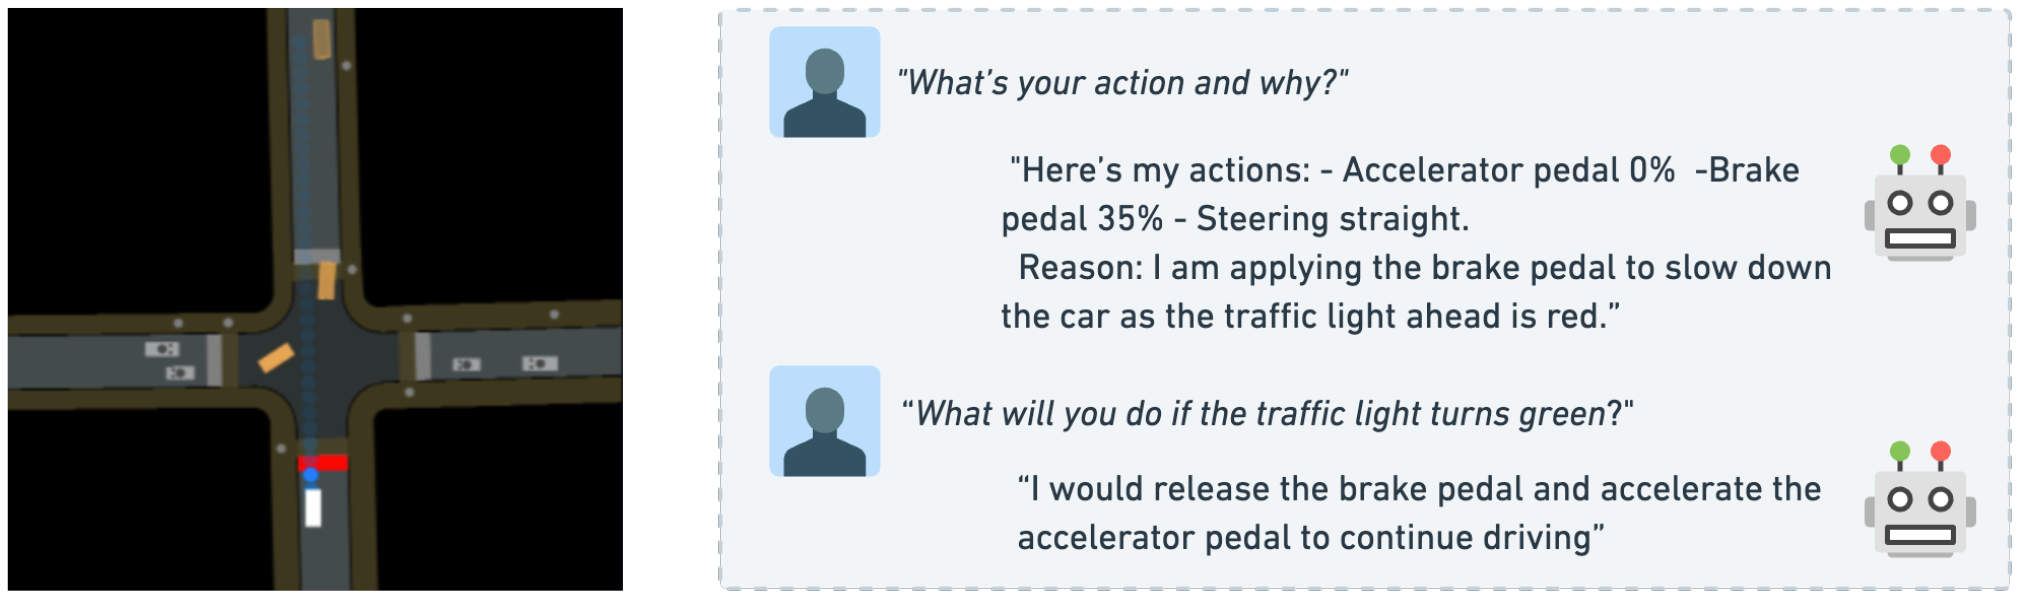
<!-- Figure 4: Demonstration of the interaction with the pretrained LLM-Driver. Notably, the driving LLM agent has the ability to anticipate future actions when prompted. Please refer to Appendix B for additional results, including some failure cases. -->
图4: 与预训练的LLM-Driver交互的演示。值得注意的是, 驾驶LLM智能体能够在出现提示时预测未来的动作。请参阅附录 B 了解更多结果, 包括一些失败案例。

<!-- To obtain the model's perception and action predictions, we prompt the model with the same vector captioning and add the action-predicting triggering question from the driving QA data. We then parse the language output using regular expressions to extract the numerical predictions. -->
为了获得模型的感知和动作预测, 我们<font color="red">使用相同的向量字幕提示模型, 并添加(来自驾驶 QA 数据的)动作预测触发问题。
然后, 我们使用正则表达, 解析语言输出, 以提取数值预测</font>。

<!-- We reported the results on the model trained using a two stage approach (with pretraining), and the model training only on driving QA dataset (without pretraining). We also include a baseline model, Perceiver-BC, which replaces the LLM with a non-pretrained Perceiver model for comparison purposes. This aims to evaluate how effectively pretrained LLMs can be utilized for reasoning in driving-related tasks, such as action prediction. The Perceiver-BC model includes the identical Vector Encoder and V-former modules as those in the LLM agent model. However, it differs in the fact that it employs a transformer-based policy module in place of the LLM with adapters (please refer to Appendix A for more details). The Perceiver-BC model also outputs actions with perception auxiliary tasks of agent and traffic light detection. To maintain an equitable comparison, we've calibrated the BC model to have a similar number of trainable parameters as in the LLM agent, totaling to approximately 25 million trainable parameters. The Perceiver-BC model was trained on perception and action prediction tasks using the same 10k dataset that we used for the LLM Agent, but without VQA data. -->
我们报告了使用两阶段方法训练的模型的结果(带预训练), 以及仅在驾驶 QA 数据集上训练的模型的结果(无预训练)。
我们还提供一个基线模型 Perceiver-BC, 它用无预训练的 Perceiver 模型替代 LLM, 以进行对比。
其目的是评估如何有效地利用预训练的 LLM 进行驾驶相关任务的推理, 例如动作预测。
Perceiver-BC 模型包括(与 LLM 智能体模型中相同的)向量编码器和 V-former 模块。
然而, 不同之处在于它采用基于transformer的策略模块来代替带适配器的 LLM(请参阅附录 A 了解更多详细信息)。
Perceiver-BC模型也输出带有智能体和交通灯检测等感知辅助任务的动作。
为了保证公平的比较, 我们对 BC 模型进行了校准, 使其可训练参数的数量与 LLM 智能体中的相似, 总计约 2500 万个可训练参数。
Perceiver-BC 模型使用相同的 10k 数据集(在LLM 智能体中使用过), 在感知和动作预测任务上进行训练, 但没有 VQA 数据。

<!-- For the reported metrics, we calculate the Mean Absolute Error (MAE) for the predictions of the number of cars and pedestrians, denoted as Ecar and Eped respectively. Additionally, we measure the accuracy of traffic light detection as well as the mean absolute distance error in meters for traffic light distance prediction, represented as AccTL and DTL. Furthermore, we compute the MAE for normalized acceleration and brake pressure denoted as Elon., and normalized steering wheel angle denoted as Elat.. Lastly, we report the weighted cross-entropy loss for the token prediction on the evaluation set, indicated as Ltoken. -->
对于报告的指标, 我们计算汽车和行人数量预测的平均绝对误差(MAE), 分别表示为$E_{car}$和$E_{ped}$。
其次, 我们还测量交通灯检测的准确性, 以及交通灯距离预测的平均绝对距离误差(以米为单位), 表示为 $\text{Acc}_{TL}$ 和 $D_{TL}$。
然后, 我们计算归一化加速度和制动压力(表示为$E_{lon.}$)和归一化方向盘转角(表示为$E_{lat.}$)的 MAE。
最后, 我们报告评估集上词元预测的加权交叉熵损失, 表示为$L_{token}$。

<!-- Table 1: The evaluation result of perception and action prediction -->
表1: <span id='table.1'></span>感知和动作预测的评估结果
<table>
<thead>
  <tr>
    <th></th>
    <th style="text-align: center" colspan="2">agents count</th>
    <th style="text-align: center" colspan="2">traffic light</th>
    <th style="text-align: center" colspan="2">action</th>
    <th style="text-align: center">loss</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td></td>
    <td style="text-align: center"> $$E_{car}\ \downarrow$$ </td>
    <td style="text-align: center"> $$E_{ped}\ \downarrow$$ </td>
    <td style="text-align: center"> $$\text{Acc}_{TL} \ \uparrow$$ </td>
    <td style="text-align: center"> $$D_{TL} \ \downarrow$$ </td>
    <td style="text-align: center"> $$E_{lon.} \ \downarrow$$ </td>
    <td style="text-align: center"> $$E_{lat.} \ \downarrow$$ </td>
    <td style="text-align: center"> $$L_{token} \ \downarrow$$ </td>
  </tr>
  <tr>
    <td style="text-align: left"> Perceiver-BC[46] </td>
    <td style="text-align: center"> 0.869 </td>
    <td style="text-align: center"> 0.684 </td>
    <td style="text-align: center"> $\mathbf{0.900}$ </td>
    <td style="text-align: center"> $\mathbf{0.410}$ </td>
    <td style="text-align: center"> 0.180 </td>
    <td style="text-align: center"> 0.111 </td>
    <td style="text-align: center"> n/a </td>
  </tr>
  <tr>
    <td style="text-align: left">$$\text{LLM-Driver}_\text{w/o pretrain}$$</td>
    <td style="text-align: center"> 0.101 </td>
    <td style="text-align: center"> 1.668 </td>
    <td style="text-align: center"> 0.758 </td>
    <td style="text-align: center"> 7.475 </td>
    <td style="text-align: center"> 0.094 </td>
    <td style="text-align: center"> 0.014$^a$ </td>
    <td style="text-align: center"> 0.644 </td>
  </tr>
  <tr>
    <td style="text-align: left">$$\text{LLM-Driver}_\text{w/ pretrain}$$</td>
    <td style="text-align: center"> $\mathbf{0.066}$ </td>
    <td style="text-align: center"> $\mathbf{0.313}$ </td>
    <td style="text-align: center"> 0.718 </td>
    <td style="text-align: center"> 6.624 </td>
    <td style="text-align: center"> $\mathbf{0.066}$ </td>
    <td style="text-align: center"> $\mathbf{0.014}^b$ </td>
    <td style="text-align: center"> $\mathbf{0.502}$ </td>
  </tr>
  <tr>
    <td style="text-align: left">$^a$ Exact value: 0.01441</td>
  </tr>
  <tr>
    <td style="text-align: left">$^b$ Exact value: 0.01437</td>
  </tr>
  <tr>
    <td style="text-align: left">$_\text{w/o}$ means "without"</td>
  </tr>
</tbody>
</table>

<!-- As can be seen in Table 1, the results clearly demonstrate that the pretraining stage significantly enhances both the model's perception and action prediction capabilities. This suggests that the pretrained model exhibits a higher level of accuracy in perceiving and quantifying the number of cars and pedestrians in its environment. The pretrained model also shows a lower loss value, Ltoken, which indicates an improvement in the overall effectiveness of the model's token predictions. -->
从[表1](#table.1)中可以看出，结果清楚地表明预训练阶段显着增强了模型的感知和动作预测能力。
这表明预训练模型在感知和量化环境中的汽车和行人数量方面展现出更高的准确性。
预训练模型还显示出较低的损失值$L_{token}$, 这表明模型的词元预测的整体有效性有所提高。

<!-- Note that we filter out agents that fall outside the 30m range from the ego vehicle, which needs to be calculated using the x, y, z vector. This setting makes the "direct decoding" of agent detection from the vector much more difficult. For simpler regression tasks (e.g., traffic light distance), Perceiver-BC performs much better than LLMs. -->
请注意, 我们过滤掉距离自车 30米 之外的智能体, 这需要使用$x$、$y$、$z$向量进行计算。
此设置使从向量"直接解码"智能体检测变得更加困难。
<font color="blue">对于更简单的回归任务(例如, 红绿灯距离), Perceiver-BC 的表现比 LLMs 好得多</font>。

<!-- For the action prediction task requiring in-depth reasoning, we found that LLM-based policies outperform the Perceiver-BC approach when given the same amount of training data and trainable parameters. This indicates that LLMs serve as effective action predictors, harnessing knowledge acquired during the general pretraining phase—such as stopping at a red light or decelerating when vehicles or pedestrians are ahead—to inform decisions based on their grounded observations. -->
<font color="red">对于需要深度推理的动作预测任务</font>, 我们发现当给定相同数量的训练数据和可训练参数时, <font color="red">基于 LLM 的策略优于 Perceiver-BC 方法</font>。
这表明LLMs可以作为有效的行动预测器, 利用在通用预训练阶段获得的知识(例如红灯停车, 或前方有车辆或行人时减速), 基于其真实观察做出决策。

<!-- However, it's important to note the distinction in training methodologies: Perceiver-BC is trained mostly using regression on perception and control outputs, while LLMs are trained via cross-entropy token loss and benefit from an extra 16x pairs of driving questions and answers, which will reinforces the learning of perception and action prediction. Thus, the comparison might not be entirely equitable and should be taken as merely a point of reference. -->
但是, 值得注意的是训练方法的区别: Perceiver-BC 主要使用感知和控制输出的回归进行训练, 而 LLMs 通过交叉熵词元损失进行训练, 并受益于额外的 16 组驾驶问答对, 这将加强感知和动作预测的学习。
因此, 这种比较可能并不完全公平, 只能作为参考。

## Evaluation of Driving QA
<!-- To assess the quality of answers to open-ended questions about the driving environment, we use GPT-3.5 to grade our model's responses. This is a recently emerged technique for grading natural language answers [47-49]. This approach allows us to quickly and consistently evaluate our model's capabilities for questions that don't have fixed answers. -->
为了评估有关驾驶环境的开放式问题的回答质量, 我们使用 GPT-3.5 对我们的模型响应进行评分。
这是最近出现的技术, 用于对自然语言回答进行评分[47-49]。
这种方法使我们能够快速、一致地评估我们模型(对无固定答案的问题)的能力。

<!-- For evaluation, we prompt GPT-3.5 with the language-based observation description used during dataset generation (section 3.3), the question from the test set, and the model's answer. GPT's task is to write a one-line assessment, followed by a score ranging from 0 to 10 (where 0 is worst and 10 is best) for each response, based on the given observation details. The final score of the model is the average of all question scores. We note that GPT evaluations can sometimes be overly lenient with answers that are incorrect but semantically close, as well as other issues with GPT-based grading as reported by [49]. To validate these findings, we hand-scored 230 randomly sampled QA pairs and obtained comparable results. -->
为了进行评估, 我们<font color="red">使用(数据集生成期间使用的)基于语言的观察描述(第[3.3](#Driving-QA-Dataset-Labeling)节)、测试集中的问题, 以及模型的答案, 提示GPT-3.5。
GPT 的任务是编写一行评估, 然后根据给定的观察细节, 为每个响应提供 0 到 10(其中 0 为最差, 10 为最佳)的分数</font>。
模型的最终得分是所有问题得分的平均值。
我们注意到, GPT 评估有时可能过于宽松, 答案不正确但语义上接近, 以及 [49] 报告的基于 GPT 的评分的其他问题。
为了验证这些发现, 我们对 230 个随机抽样的 QA 对进行了人工评分, 并获得了可比较的结果。

<!-- Table 2: Grading of the Driving QA outputs -->
表2: <span id='table.2'></span>驾驶 QA 输出的评级
| | GPT Grading $\uparrow$ | Human Grading $\uparrow$ |
| :- | :-: | :-: |
| Constant answer "I don’t know" | 2.92 | 0.0 |
| Randomly shuffled answers | 3.88 | 0.26 |
| $\text{LLM-Driver}_\text{w/o pretrain}$ | 7.48 | 6.63 |
| $\text{LLM-Driver}_\text{w pretrain}$ | $\textbf{8.39}$ | $\textbf{7.71}$ |
| Answers generated by GPT | 9.47 | 9.24 |

<!-- Our results in Table 2 demonstrate that pre-training improves the grading score of the model by 9.1% and 10.8% over those models without pre-training, according to both GPT grading and human grading. For reference, we also provide the scores obtained when running our evaluation procedure with artificially incorrect answers (by either constantly answering "I don’t know" or by randomly shuffling all answers), as well as the "ground-truth" answer labels provided by GPT. From these results, we can see that our model, which utilizes only vectorized representations as input, can achieve a much higher score than either a constant or random answer approach. -->
[表2](#table.2)中的结果表明, 根据 GPT 评分和人工评分, 预训练使模型的评分(比无预训练的模型)分别提高了 9.1% 和 10.8%。
作为参考, 我们还提供了用(通过不断回答"我不知道"或随机打乱所有答案得到的)人为错误答案运行评估程序时获得的分数, 以及GPT 提供的真值回答标签。
从这些结果中, 我们可以看到我们的模型(仅使用向量化表示作为输入)可以(比恒定或随机回答方法)获得更高的分数。

# Conclusion and Limitations
<!-- While our approach exhibits considerable novelty and potential, the preliminary results indicate that there is still progress to be made for the LLM to fully navigate in simulation. We are aware of possible discrepancies in open-loop vs closed-loop results [50], and our future work will focus on addressing the challenge of efficiently evaluating the model in a closed-loop system. This includes addressing the lengthy inference time of LLMs and the extensive steps needed to thoroughly test the system. Moreover, we anticipate the need to improve the precision of the direct driving commands produced by our baseline in order to operate effectively in closed-loop settings. Factors contributing to this include the intricacy of the task, potential enhancements to the model architecture, and the need for improving the scale and quality of our training dataset. We have observed that numeric inaccuracies and the early developmental stage of our system can lead to discrepancies in explanations and reasoning, preventing our ideas from being fully implemented in closed-loop settings. These observations will guide our future research as we continue to refine our approach. -->
虽然我们的方法表现出极大的创新和潜力, 但初步结果表明, LLM在模拟中全面导航仍有进步空间。
<font color="red">我们意识到开环与闭环结果可能存在差异[50], 我们未来的工作将侧重于解决在闭环系统中有效评估模型的挑战</font>。
这包括解决LLMs漫长的推理时间, 以及彻底测试系统所需的大量步骤。
此外, 我们计划提高(我们基线生成的)直接驾驶命令的精度, 以便在闭环设置中有效运行。
导致这种情况的因素包括任务的复杂性、模型架构的潜在增强以及提高训练数据集的规模和质量的需要。
我们观察到, 数值不准确和系统的早期开发阶段可能会导致解释和推理方面的差异, 从而阻止我们的想法在闭环配置中得到充分实施。
随着我们继续完善我们的方法, 这些观察将指导我们未来的研究。

<!-- Nevertheless, our work establishes a foundation for future research in this direction. We believe that our proposed architecture, combined with the novel way for grounding a new modality into LLMs, a data auto-labelling pipeline, and an LLM-based evaluation pipeline, can serve as a starting point for researchers interested in exploring the integration of numeric vector modality with LLMs in the context of autonomous driving. -->
尽管如此, 我们的工作为该方向的未来研究奠定了基础。我们相信, 我们所提出的架构, (它耦合将新模态融入LLMs中的新方法、数据自动标注pipeline和基于LLM的评估pipeline,) 对于有兴趣探索自动驾驶背景下数值向量模态与LLMs集成的研究人员来说, 可以作为一个起点。

<!-- In terms of future research, improving the architecture to better handle nuances in the numeric vector modality could offer a promising direction. Our approach holds potential for application beyond simulated environments. Given sufficient real-world perception labels for pretraining and fine-tuning a VLM, our methodology could also be adapted to real-world driving scenarios. -->
就未来研究而言, 改进架构以更好地处理数值向量模态中的细微差别可能会提供一个有希望的方向。
我们的方法有超出模拟环境的应用潜力。
如果有足够的现实世界感知标签, 用于预训练和微调一个VLM, 我们的方法也可以适用于现实世界的驾驶场景。

<!-- Overall, while our results are preliminary we believe our work is a significant step forward in the integration of vector modality with LLMs in the context of autonomous driving. -->
整体而言, 虽然我们的结果是初步的, 但是我们相信我们的工作是(自动驾驶背景下向量模态与LLMs集成方面的)重要一步。